In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = 100

In [21]:
df = pd.read_csv("SmplHDataset.csv")

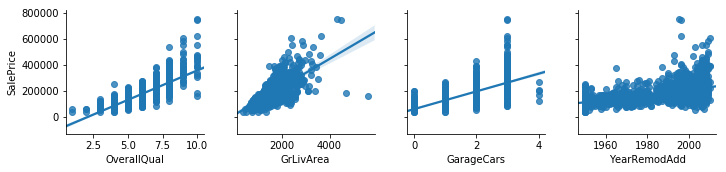

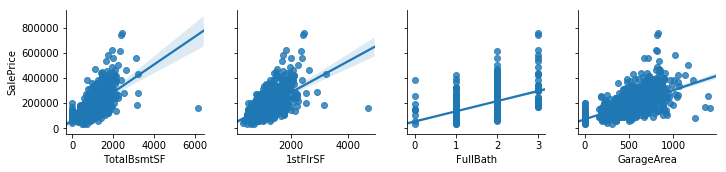

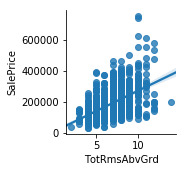

In [55]:
# Visualisation des corrélations entre variables numériques :
sns.pairplot(data = df, y_vars = "SalePrice", x_vars=["OverallQual","GrLivArea","GarageCars","YearRemodAdd"], kind = "reg" )
sns.pairplot(data = df, y_vars = "SalePrice", x_vars=["TotalBsmtSF","1stFlrSF","FullBath","GarageArea"], kind = "reg")
sns.pairplot(data = df, y_vars = "SalePrice", x_vars=["TotRmsAbvGrd"], kind = "reg")

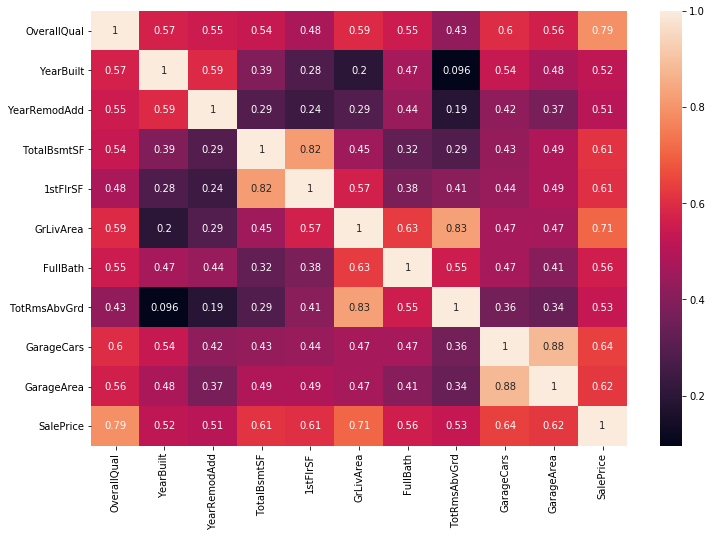

In [57]:
corr = df.corr()
top_features = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize = (12,8))
top_corr = df[top_features].corr()
sns.heatmap(top_corr, annot = True)

In [22]:
X = df.iloc[:, :-1]
y = df["SalePrice"]

In [59]:
#def des colonnes 
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating', "Utilities")
len(cols)

#encodage
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder()
    X[c] = lbl.fit_transform(list(X[c]))
    
"""#get dummies
df = pd.get_dummies(df,drop_first=True)"""

KeyError: 'BsmtQual'

In [24]:
X = X.dropna(axis=1, how='any', thresh=1000, inplace=False)
X = X.fillna(X.mean())

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
#Fitting Multiple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

#Predicting the Test set result
y_pred = reg.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 


0.4768477650093438

In [36]:
from sklearn.linear_model import Lasso
reg_lasso1 = Lasso()
reg_lasso1.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
R2_lasso = reg_lasso1.score(X_test, y_test)
print("Lasso Alpha 1 : {}".format(R2_lasso))

Lasso Alpha 1 : 0.5008979602176473


In [49]:
from sklearn.linear_model import Ridge
linear_regressor_ridge = Ridge(alpha = 100)
linear_regressor_ridge.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
R2_ridge = linear_regressor_ridge.score(X_test, y_test)
print("Ridge Alpha 100 : {}".format(R2_ridge))

Ridge Alpha 100 : 0.6761857977612169
